In [1]:
# ÌôòÍ≤Ω ÏÑ§Ï†ï
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts -nanum

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fontpath, size = 9)
plt.rc('font', family = 'NanumBarunGothic')
mpl.font_manager._rebuild()

E: Command line option 'n' [from -nanum] is not understood in combination with the other options.


In [2]:
# ÏÇ¨Ïö© Ìå®ÌÇ§ÏßÄ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Íµ¨Í∏Ä ÏΩîÎû©Ïóê ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
from google.colab import files
files.upload()

Saving KakaoTalkS.txt to KakaoTalkS.txt


{'KakaoTalkS.txt': b"\xec\x84\xb1\xec\x88\x98 \xeb\x8b\x98\xea\xb3\xbc \xec\xb9\xb4\xec\xb9\xb4\xec\x98\xa4\xed\x86\xa1 \xeb\x8c\x80\xed\x99\x94\r\n\xec\xa0\x80\xec\x9e\xa5\xed\x95\x9c \xeb\x82\xa0\xec\xa7\x9c : 2021-01-27 00:00:58\r\n\r\n--------------- 2020\xeb\x85\x84 5\xec\x9b\x94 19\xec\x9d\xbc \xed\x99\x94\xec\x9a\x94\xec\x9d\xbc ---------------\r\n[\xec\x84\xb1\xec\x88\x98] [\xec\x98\xa4\xec\xa0\x84 10:50] \xec\xa0\x84\xec\x97\x90 MBTI\r\n[\xec\x84\xb1\xec\x88\x98] [\xec\x98\xa4\xec\xa0\x84 10:50] \xec\x8b\xac\xeb\xa6\xac\xed\x96\x88\xeb\x8d\x98\xea\xb1\xb0\r\n[\xec\x84\xb1\xec\x88\x98] [\xec\x98\xa4\xec\xa0\x84 10:50] \xec\x96\xb4\xeb\x94\x94\xec\x95\xbc?\r\n[\xe3\x85\x85\xe3\x85\x8e\xf0\x9f\x8c\xbb] [\xec\x98\xa4\xec\xa0\x84 10:51] \xeb\xa7\x81\xed\x81\xac \xec\xa4\xac\xeb\x8a\x94\xeb\x8e\x85\r\n[\xe3\x85\x85\xe3\x85\x8e\xf0\x9f\x8c\xbb] [\xec\x98\xa4\xec\xa0\x84 10:51] \xe3\x84\xb1\xe3\x84\xb7\r\n[\xe3\x85\x85\xe3\x85\x8e\xf0\x9f\x8c\xbb] [\xec\x98\xa4\xec\xa0\x84 10:51] http

In [4]:
data = open('KakaoTalkS.txt', 'r')

In [5]:
# readlines() : ÌÖçÏä§Ìä∏Î•º ÌÜµÏß∏Î°ú Í∞ÄÎÖÄÏò§Îäî Í≤ÉÏúºÎ°ú ÏÉàÎ°úÏö¥ Î≥ÄÏàòÏóê ÏÑ†Ïñ∏
df = data.readlines()

list = []   # Î∞òÎ™©Î¨∏ÏùÑ ÎèåÎ¶¨Í∏∞ ÏúÑÌï¥ Îπà list ÎßåÎì§Í∏∞

for i in df :
  i = i.rstrip('\n')
  i = i.strip()
  list.append(i)  # appendÎ•º Ïù¥Ïö©Ìï¥ Îπà listÏóê ÏåìÍ∏∞

In [6]:
# ÏúÑ Î¶¨Ïä§Ìä∏Î•º Í∞ñÍ≥† Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Ï†úÏûë
list_drop = list[4:]

In [7]:
col_names = ['words']

In [8]:
df = pd.DataFrame(list_drop, columns=col_names)
df.head()

words
0  [ÏÑ±Ïàò] [Ïò§Ï†Ñ 10:50] Ï†ÑÏóê MBTI
1    [ÏÑ±Ïàò] [Ïò§Ï†Ñ 10:50] Ïã¨Î¶¨ÌñàÎçòÍ±∞
2     [ÏÑ±Ïàò] [Ïò§Ï†Ñ 10:50] Ïñ¥ÎîîÏïº?
3  [„ÖÖ„Öéüåª] [Ïò§Ï†Ñ 10:51] ÎßÅÌÅ¨ Ï§¨ÎäîÎéÖ
4      [„ÖÖ„Öéüåª] [Ïò§Ï†Ñ 10:51] „Ñ±„Ñ∑

In [9]:
df['kakao'] = df['words'].apply(lambda x : re.sub('[^Í∞Ä-Ìû£]', ' ', x))

In [10]:
df.head()

words                    kakao
0  [ÏÑ±Ïàò] [Ïò§Ï†Ñ 10:50] Ï†ÑÏóê MBTI   ÏÑ±Ïàò   Ïò§Ï†Ñ        Ï†ÑÏóê     
1    [ÏÑ±Ïàò] [Ïò§Ï†Ñ 10:50] Ïã¨Î¶¨ÌñàÎçòÍ±∞     ÏÑ±Ïàò   Ïò§Ï†Ñ        Ïã¨Î¶¨ÌñàÎçòÍ±∞
2     [ÏÑ±Ïàò] [Ïò§Ï†Ñ 10:50] Ïñ¥ÎîîÏïº?      ÏÑ±Ïàò   Ïò§Ï†Ñ        Ïñ¥ÎîîÏïº 
3  [„ÖÖ„Öéüåª] [Ïò§Ï†Ñ 10:51] ÎßÅÌÅ¨ Ï§¨ÎäîÎéÖ         Ïò§Ï†Ñ        ÎßÅÌÅ¨ Ï§¨ÎäîÎéÖ
4      [„ÖÖ„Öéüåª] [Ïò§Ï†Ñ 10:51] „Ñ±„Ñ∑             Ïò§Ï†Ñ

In [11]:
pip install soynlp

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 419kB 10.8MB/s 


In [12]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency = 100,
     min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
      )
word_extractor.train(df['kakao'].values) # list of str or like
words = word_extractor.extract()

training was done. used memory 0.144 Gb
all cohesion probabilities was computed. # words = 3
all branching entropies was computed # words = 1073
all accessor variety was computed # words = 1073


In [13]:
from soynlp.tokenizer import LTokenizer

from soynlp.word import WordExtractor
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word : score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores = cohesion_score)

In [14]:
df['tokenizer'] = df['kakao'].apply(lambda x : tokenizer.tokenize(x, remove_r= True))

In [15]:
words = []
for i in df['tokenizer'].values : 
  for k in i : 
    words.append(k)

In [16]:
words

['ÏÑ±Ïàò',
 'Ïò§Ï†Ñ',
 'Ï†ÑÏóê',
 'ÏÑ±Ïàò',
 'Ïò§Ï†Ñ',
 'Ïã¨Î¶¨ÌñàÎçòÍ±∞',
 'ÏÑ±Ïàò',
 'Ïò§Ï†Ñ',
 'Ïñ¥ÎîîÏïº',
 'Ïò§Ï†Ñ',
 'ÎßÅÌÅ¨',
 'Ï§¨ÎäîÎéÖ',
 'Ïò§Ï†Ñ',
 'Ïò§Ï†Ñ',
 'Ïò§Ï†Ñ',
 'Ïù¥Í±∞',
 'ÎÖÑ',
 'Ïõî',
 'Ïùº',
 'ÏàòÏöîÏùº',
 'Ïò§ÌõÑ',
 'Ïò§Îπ†',
 'Ïò§ÌõÑ',
 'Ïò§Îäò',
 'Ïßë',
 'Îä¶Í≤å',
 'Îì§Ïñ¥Í∞ÄÎÉê',
 'Ïò§ÌõÑ',
 'ÏÇ¨ÏßÑ',
 'Ïò§ÌõÑ',
 'Í∞†Ï†ÅÏúºÎ°ú',
 'Î©îÎìúÏñ¥Î∞îÏõÉÏ¥àÏΩúÎ¶ø',
 'Ïò§ÌõÑ',
 'ÌïµÎßõ',
 'Ïò§ÌõÑ',
 'ÏûàÏúºÎ©¥',
 'Î®πÏñ¥Î≥¥ÏÑ∏',
 'Ïò§ÌõÑ',
 'Ïò§ÌõÑ',
 'ÏÇ¨Ïã§',
 'ÎÇ¥Í∞Ä',
 'Î®πÍ≥†Ïã∂ÏùÄ',
 'ÎßõÏù¥ÏûàÎäîÎç∞',
 'ÏÑ±Ïàò',
 'Ïò§ÌõÑ',
 'Í∑∏ÎûòÍ∑∏Îûò',
 'Ïò§ÌõÑ',
 'ÏÑ∏Ï¢ÖÏóê',
 'Í∑∏',
 'ÎßõÏù¥',
 'ÏóÜÏñ¥',
 'Ïò§ÌõÑ',
 'Ïò§Îπ†Îûë',
 'Ï±ÑÎ†®Ïù¥',
 'ÏöîÏ¶ò',
 'Ïó¥Í≥µÌïòÏãúÍ∏∏Îûò',
 'ÏùëÏõêÏ∞®',
 'Î≥¥ÎÇ∏Í±∞Ïñå',
 'Ïò§ÌõÑ',
 'ÏïàÎÜç',
 'Ïò§ÌõÑ',
 'Ïù¥Î™®Ìã∞ÏΩò',
 'ÏÑ±Ïàò',
 'Ïò§ÌõÑ',
 'Í±∞ÎßôÎã§',
 'Ïò§ÌõÑ',
 'Ïπ¥Îìú',
 'ÎπÑÎ≤à',
 'Ïò®ÎùºÏù∏',
 'Ïπ¥Îìú',
 'Í≤∞Ï†úÌï†Îïå',
 'ÏùºÎ∞ò',
 'Í≤∞Ï†ú',
 'Î™Ö',
 'ÏÜåÌù¨Îßò',
 'Í∑∏ÎûòÏÑú',
 'ÏûÑ',
 'ÌòπÏãú',
 'Î™®Î•¥ÎãàÍπå',
 'ÎÇòÏ§ëÏóê',


In [17]:
from collections import Counter

In [18]:
count = Counter(words)
words_dict = dict(count)

In [19]:
words_dict

{'ÏÑ±Ïàò': 849,
 'Ïò§Ï†Ñ': 162,
 'Ï†ÑÏóê': 2,
 'Ïã¨Î¶¨ÌñàÎçòÍ±∞': 1,
 'Ïñ¥ÎîîÏïº': 1,
 'ÎßÅÌÅ¨': 1,
 'Ï§¨ÎäîÎéÖ': 1,
 'Ïù¥Í±∞': 7,
 'ÎÖÑ': 66,
 'Ïõî': 69,
 'Ïùº': 71,
 'ÏàòÏöîÏùº': 11,
 'Ïò§ÌõÑ': 2001,
 'Ïò§Îπ†': 37,
 'Ïò§Îäò': 19,
 'Ïßë': 2,
 'Îä¶Í≤å': 1,
 'Îì§Ïñ¥Í∞ÄÎÉê': 1,
 'ÏÇ¨ÏßÑ': 79,
 'Í∞†Ï†ÅÏúºÎ°ú': 1,
 'Î©îÎìúÏñ¥Î∞îÏõÉÏ¥àÏΩúÎ¶ø': 1,
 'ÌïµÎßõ': 1,
 'ÏûàÏúºÎ©¥': 2,
 'Î®πÏñ¥Î≥¥ÏÑ∏': 1,
 'ÏÇ¨Ïã§': 3,
 'ÎÇ¥Í∞Ä': 24,
 'Î®πÍ≥†Ïã∂ÏùÄ': 1,
 'ÎßõÏù¥ÏûàÎäîÎç∞': 1,
 'Í∑∏ÎûòÍ∑∏Îûò': 3,
 'ÏÑ∏Ï¢ÖÏóê': 1,
 'Í∑∏': 9,
 'ÎßõÏù¥': 1,
 'ÏóÜÏñ¥': 3,
 'Ïò§Îπ†Îûë': 2,
 'Ï±ÑÎ†®Ïù¥': 3,
 'ÏöîÏ¶ò': 4,
 'Ïó¥Í≥µÌïòÏãúÍ∏∏Îûò': 1,
 'ÏùëÏõêÏ∞®': 1,
 'Î≥¥ÎÇ∏Í±∞Ïñå': 1,
 'ÏïàÎÜç': 2,
 'Ïù¥Î™®Ìã∞ÏΩò': 16,
 'Í±∞ÎßôÎã§': 1,
 'Ïπ¥Îìú': 2,
 'ÎπÑÎ≤à': 3,
 'Ïò®ÎùºÏù∏': 3,
 'Í≤∞Ï†úÌï†Îïå': 1,
 'ÏùºÎ∞ò': 1,
 'Í≤∞Ï†ú': 3,
 'Î™Ö': 1,
 'ÏÜåÌù¨Îßò': 1,
 'Í∑∏ÎûòÏÑú': 5,
 'ÏûÑ': 1,
 'ÌòπÏãú': 4,
 'Î™®Î•¥ÎãàÍπå': 1,
 'ÎÇòÏ§ëÏóê': 5,
 'Ìï†': 3,
 'Îïå': 5,
 'Î≥ÄÍ≤Ω': 1,
 'Í∞ÄÎä•ÌïòÎãàÍπå': 1,
 'ÏóÑÎßà': 2,
 'Ïó¨Ïú†Î°úÏö∏': 1,
 

In [20]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§ÏπòÌï¥ Í≤ΩÎ°úÏÑ§Ï†ïÌï¥Ï£ºÍ∏∞ 
!apt -qq -y install fonts-nanum > /dev/null # Ìè∞Ìä∏ ÎÇòÎàîÏùÑ Íµ¨Í∏ÄÏΩîÎû©Ïóê ÏÑ§ÏπòÌïòÍ≥† Í≤ΩÎ°úÎ•º ÌååÏïÖÌï®
import matplotlib.font_manager as fm 
fontpath='/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font=fm.FontProperties(fname=fontpath,size=9)

## ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', width=500, height=500, background_color='white').generate_from_frequencies(words_dict)

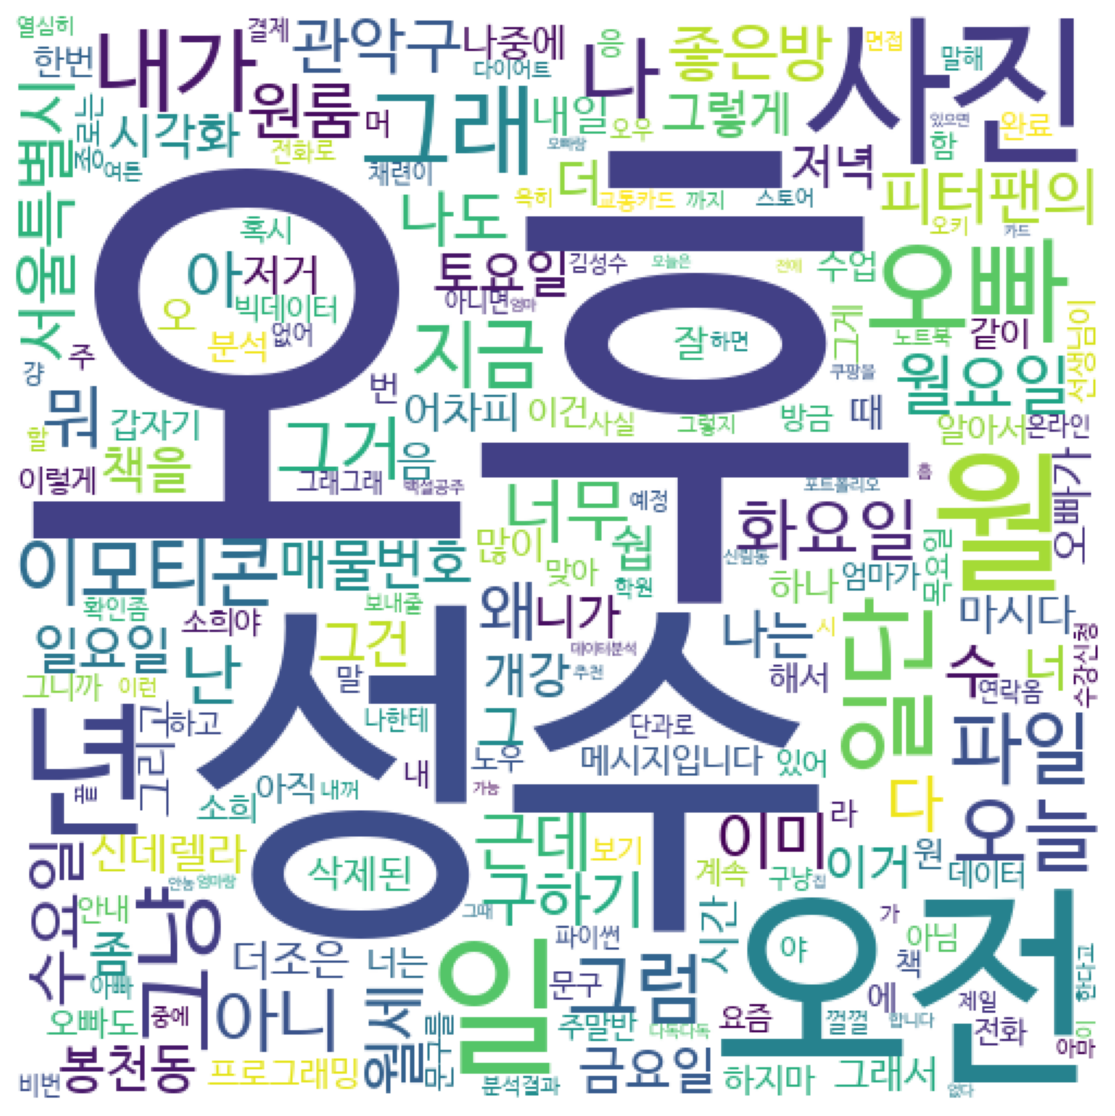

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()